In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
x = np.linspace(0,2*np.pi, num = 20)
y = np.linspace(0,2*np.pi, num = 20)
z = np.linspace(0,1, num = 20)
largo = np.size(x)
cant_muestras = np.arange(largo)

In [3]:
target = np.array([])
data = np.array([])
def funcion(x,y,z):
  return np.cos(x)+np.sin(y)+z

for i in cant_muestras:
  for j in cant_muestras:
    for k in cant_muestras:
      target = np.append(target, funcion(x[i],y[j],z[k]))
      data = np.append(data,[[x[i],y[j],z[k]]])
data = data.reshape(8000,3)


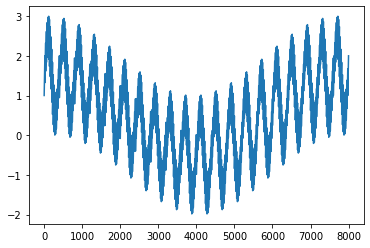

In [4]:
plt.plot(target)

In [5]:
capa_oculta = 7
model = tf.keras.Sequential() 
model.add(tf.keras.layers.Dense(capa_oculta, input_dim=3, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, input_dim=capa_oculta)) 
model.summary() 
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5) 
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss= 'MeanSquaredError')
hist = model.fit(x= data, y= target, batch_size=largo, epochs=300, callbacks=[es]) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 28        
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
400/400 [==============================] - 3s 2ms/step - loss: 1.1058
Epoch 2/300
400/400 [==============================] - 1s 2ms/step - loss: 0.7783
Epoch 3/300
400/400 [==============================] - 1s 2ms/step - loss: 0.7167
Epoch 4/300
400/400 [==============================] - 1s 2ms/step - loss: 0.6813
Epoch 5/300
400/400 [==============================] - 1s 2ms/step - loss: 0.6542
Epoch 6/300
400/400 [=========================

In [7]:
#pruebo con la funcion de activacion sigmoide

capa_oculta = 7
model2 = tf.keras.Sequential() 
model2.add(tf.keras.layers.Dense(capa_oculta, input_dim=3, activation = 'sigmoid'))
model2.add(tf.keras.layers.Dense(1, input_dim=capa_oculta)) 
model2.summary() 
es2 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5) 
model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss= 'MeanSquaredError')
hist2 = model2.fit(x= data, y= target, batch_size=largo, epochs=300, callbacks=[es2])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 28        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
400/400 [==============================] - 1s 2ms/step - loss: 1.1037
Epoch 2/300
400/400 [==============================] - 1s 2ms/step - loss: 0.9846
Epoch 3/300
400/400 [==============================] - 1s 2ms/step - loss: 0.9286
Epoch 4/300
400/400 [==============================] - 1s 2ms/step - loss: 0.8867
Epoch 5/300
400/400 [==============================] - 1s 2ms/step - loss: 0.8543
Epoch 6/300
400/400 [=======================

In [8]:
#realizo barrido en x
target2 = np.array([])
prediction = np.array([])
prediction2 = np.array([])
for i in cant_muestras:
  target2 = np.append(target2, funcion(x[i],x[i],x[i]))
  a = np.array([x[i],x[i],x[i]]).reshape(1,3)
  prediction = np.append(prediction,model.predict(x=a))
  prediction2 = np.append(prediction2,model2.predict(x=a))


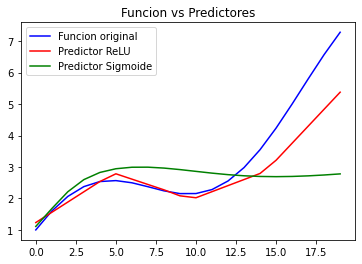

In [9]:
plt.plot(target2, color = 'blue', label = 'Funcion original')
plt.plot(prediction, color = 'red', label = 'Predictor ReLU')
plt.plot(prediction2, color = 'green', label = 'Predictor Sigmoide')
plt.title("Funcion vs Predictores")
plt.legend()